# **Loading Chembert**

In [ ]:
%%capture
!pip install transformers torch rdkit-pypi

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
from rdkit import Chem

In [ ]:
%%capture
# Load ChemBERTa tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("DeepChem/ChemBERTa-77M-MLM")
bertModel = AutoModel.from_pretrained("DeepChem/ChemBERTa-77M-MLM")

def featurize_smiles(smiles: str):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        raise ValueError("Invalid SMILES string")

    inputs = tokenizer(smiles, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = bertModel(**inputs)

    # Extract the last hidden state of the first token (CLS token)
    feature_vector = outputs.last_hidden_state[:, 0, :].squeeze().numpy()
    return feature_vector

Some weights of RobertaModel were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MLM and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# Make chembert dataset (skip this if you possess chembert dataset)

In [ ]:
import pandas as pd
from rdkit.Chem import AllChem

In [ ]:
data = pd.read_csv("tox21.csv")
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'tox21.csv'

In [ ]:
vector_data = []

for smile in data['smiles']:
  # print(smile)
  vector = featurize_smiles(smile)
  vector_data.append(vector.tolist())

[23:09:29] WARNING: not removing hydrogen atom without neighbors


In [ ]:
vector_df = pd.DataFrame(vector_data, columns=[f"feat_{i}" for i in range(len(vector_data[0]))])

In [ ]:
# Concatenate original data with new features
data_extended = pd.concat([data, vector_df], axis=1)
data_extended.head()

,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,...,feat_374,feat_375,feat_376,feat_377,feat_378,feat_379,feat_380,feat_381,feat_382,feat_383
0,0,0,1,0,0,0,0,1,0,0,...,-0.073443,-0.227335,0.346322,-0.126001,0.145951,0.125935,0.072277,0.266505,0.345285,-0.110027
1,0,0,0,0,0,0,0,0,0,0,...,-0.235833,-0.191144,-0.321433,0.022152,0.045559,0.433665,0.091791,-0.060648,0.034646,0.020900
2,0,0,0,0,0,0,0,0,0,0,...,-0.057754,-0.256182,0.009743,0.048784,-0.166178,-0.372521,-0.129356,0.445783,-0.316509,-0.026808
3,0,0,0,0,0,0,0,0,0,0,...,0.121872,0.011055,-0.011683,0.680332,-0.230135,-0.469919,0.052845,0.067021,0.043674,0.528042
4,0,0,0,0,0,0,0,0,0,0,...,-0.250816,0.054943,0.026177,-0.267474,-0.273104,-0.021731,-0.058599,-0.239611,0.381739,-0.727147


In [ ]:
data_extended.to_csv('tox21_chembert.csv', index=False)

# Example (you can skip this too)

In [ ]:
# Example usage
smiles_string = "CCCCCO"
vector = featurize_smiles(smiles_string)
print("Feature vector:", vector, type(vector))

Feature vector: [ 1.8269815e-01 -6.6375211e-02  2.6010182e-02 -5.2466199e-02
  2.1230969e-01  1.8145745e-01  1.1891618e-01  2.1433438e-01
 -5.6626704e-02  8.7069899e-02  5.4623979e-01  7.0520200e-02
 -1.9711907e-01  1.6264158e-01  2.9106708e-02  9.2716143e-02
  2.2496915e-01  2.6783821e-01 -2.9675210e-01 -2.6107630e-01
 -7.1512580e-02 -1.7759144e-01 -2.4412775e-01  1.7673215e-01
 -2.6680896e-01 -3.7515908e-01 -3.6282462e-01  1.0450772e-01
  8.8345051e-02 -2.4341781e-02 -2.3556326e-01 -1.0058733e-01
  4.0118209e-01 -4.8059955e-01 -1.6789183e-01  5.6977201e-01
  2.0264068e-01 -8.9376897e-02 -3.2338950e-01  8.6315155e-02
 -2.6355630e-01 -1.9829966e-01  3.8296136e-01 -2.1603595e-01
  6.3340431e-01 -1.8082369e-02  8.1638239e-02 -2.4922985e-01
  8.1593320e-02  7.4145031e-01  2.1137528e-01  4.4770185e-02
  1.7142843e-01 -9.1867313e-02  2.9250085e-02 -1.7736892e-01
 -1.1057693e-02  4.7806185e-03  2.9311204e-01 -2.0302479e-01
 -2.0369756e-01  4.6484642e-02  3.4105593e-01 -5.4377371e-01
  4.3454

In [ ]:
vector.shape

(384,)

# **Load Chembert data**

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
data = pd.read_csv('tox21_chembert.csv')

# if you don't have chembert data and ran above cells:
# data = data_extended

In [ ]:
data.head()

,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,...,feat_374,feat_375,feat_376,feat_377,feat_378,feat_379,feat_380,feat_381,feat_382,feat_383
0,0,0,1,0,0,0,0,1,0,0,...,-0.073443,-0.227335,0.346322,-0.126001,0.145951,0.125935,0.072277,0.266505,0.345285,-0.110027
1,0,0,0,0,0,0,0,0,0,0,...,-0.235833,-0.191144,-0.321433,0.022152,0.045559,0.433665,0.091791,-0.060648,0.034646,0.020900
2,0,0,0,0,0,0,0,0,0,0,...,-0.057754,-0.256182,0.009743,0.048784,-0.166178,-0.372521,-0.129356,0.445783,-0.316509,-0.026808
3,0,0,0,0,0,0,0,0,0,0,...,0.121872,0.011055,-0.011683,0.680332,-0.230135,-0.469919,0.052845,0.067021,0.043674,0.528042
4,0,0,0,0,0,0,0,0,0,0,...,-0.250816,0.054943,0.026177,-0.267474,-0.273104,-0.021731,-0.058599,-0.239611,0.381739,-0.727147


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Normalization
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

# **Chembert Model**

In [ ]:
TOX21_TASKS = ['NR-AR']
task_data = data.iloc[:, 0:1]
feature_data = data.iloc[:, 14:]

In [ ]:
feature_data.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_374,feat_375,feat_376,feat_377,feat_378,feat_379,feat_380,feat_381,feat_382,feat_383
0,-0.269277,-0.276889,0.054443,0.080747,0.294719,0.091265,-0.433570,0.272965,-0.103528,-0.033506,...,-0.073443,-0.227335,0.346322,-0.126001,0.145951,0.125935,0.072277,0.266505,0.345285,-0.110027
1,0.308325,0.079071,-0.140849,-0.156532,0.237240,-0.227736,0.094535,-0.278687,-0.155715,-0.080793,...,-0.235833,-0.191144,-0.321433,0.022152,0.045559,0.433665,0.091791,-0.060648,0.034646,0.020900
2,0.393116,-0.197608,-0.222917,0.264122,0.299803,-0.020988,0.204860,0.012384,-0.130962,0.372215,...,-0.057754,-0.256182,0.009743,0.048784,-0.166178,-0.372521,-0.129356,0.445783,-0.316509,-0.026808
3,-0.208522,0.010328,0.000751,0.147145,0.236038,0.557401,0.056931,0.212893,-0.338393,0.158116,...,0.121872,0.011055,-0.011683,0.680332,-0.230135,-0.469919,0.052845,0.067021,0.043674,0.528042
4,0.442861,-0.025476,0.067009,0.011993,0.262802,-0.124492,0.008302,0.189261,0.320095,0.279310,...,-0.250816,0.054943,0.026177,-0.267474,-0.273104,-0.021731,-0.058599,-0.239611,0.381739,-0.727147


In [ ]:
# normalize data - Using Standard Scaler for all features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(feature_data)

In [ ]:
from joblib import dump, load
dump(scaler, "scaler.pkl")

['scaler.pkl']

In [ ]:
print(task_data.shape)
print(scaled_features.shape)

#split the data into training and test data
features_train, features_test, task_train, task_test = train_test_split(scaled_features, task_data, test_size=0.20, random_state=42)

(7831, 1)
(7831, 384)


In [ ]:
# Show number of 0's and 1's for NR-AR
task_train.value_counts()

,count
NR-AR,
0,6016
1,248


In [ ]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(sampling_strategy=0.5)  # Adjust the ratio
# features_train, task_train = smote.fit_resample(features_train, task_train)

# task_train.value_counts()


,count
NR-AR,
0,6016
1,3008


In [ ]:
def calculate_class_weights(y):
    unique_classes, class_counts = np.unique(y, return_counts=True)
    total_samples = len(y)
    class_weights = {}

    for class_label, class_count in zip(unique_classes, class_counts):
        class_weight = total_samples / (2.0 * class_count)
        class_weights[class_label] = class_weight

    return class_weights

# y contains the class labels (0s and 1s) for the binary classification problem
class_weights = calculate_class_weights(task_train)
print("Class weights:", class_weights)

Class weights: {0: 0.75, 1: 1.5}


In [ ]:
# Custom MCC Metric
def matthews_correlation(y_true, y_pred):
    y_pred_pos = K.round(y_pred)  # Convert probabilities to 0 or 1
    y_true = K.cast(y_true, dtype=tf.float32)

    tp = K.sum(y_true * y_pred_pos)
    tn = K.sum((1 - y_true) * (1 - y_pred_pos))
    fp = K.sum((1 - y_true) * y_pred_pos)
    fn = K.sum(y_true * (1 - y_pred_pos))

    numerator = (tp * tn - fp * fn)
    denominator = K.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn) + K.epsilon())

    return numerator / (denominator + K.epsilon())  # Avoid division by zero

In [ ]:
def design_model(features):
    model = Sequential(name="Model")
    num_features = features.shape[1]

    #input layer
    inputs = Input(shape=(num_features,))

    # Add a normalizer layer
    normalizer = Normalization()
    normalizer.adapt(features)

    inputs = normalizer(inputs)

    #Hidden layers
    x1 = Dense(32, activation="relu")(inputs)
    x1 = Dropout(0.42)(x1)  # Prevent overfitting (42 - the meaning of life)


    outputs = Dense(1, activation='sigmoid', name='output')(x1) #Binary Classification

    model = Model(inputs=inputs, outputs=outputs)

    opt = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy',  metrics=["AUC", "f1_score", "recall"], optimizer=opt)

    return model

In [ ]:
# Build the model
model = design_model(features_train)

In [ ]:
print(model.layers)

print(model.summary())

[<InputLayer name=keras_tensor_11CLONE, built=True>, <Dense name=dense_2, built=True>, <Dropout name=dropout_2, built=True>, <Dense name=output, built=True>]


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ keras_tensor_11CLONE (InputLayer)    │ (None, 384)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │          12,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,353 (48.25 KB)

 Trainable params: 12,353 (48.25 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
history = model.fit(features_train,
                    task_train,
                    epochs=250,
                    batch_size=32,
                    verbose=1,
                    validation_split=0.2,
                    class_weight=class_weights)

# validation_split: Reserves a fraction of the training data to evaluate the model's performance on unseen data during training.
# Helps monitor overfitting and tune hyperparameters without using the test set.

Epoch 1/250
226/226 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - AUC: 0.7302 - f1_score: 0.2920 - loss: 0.5717 - recall: 0.6419 - val_AUC: 0.0000e+00 - val_f1_score: 1.0000 - val_loss: 0.6371 - val_recall: 0.6438
Epoch 2/250
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8822 - f1_score: 0.2744 - loss: 0.3181 - recall: 0.6662 - val_AUC: 0.0000e+00 - val_f1_score: 1.0000 - val_loss: 0.4858 - val_recall: 0.7169
Epoch 3/250


KeyboardInterrupt: 

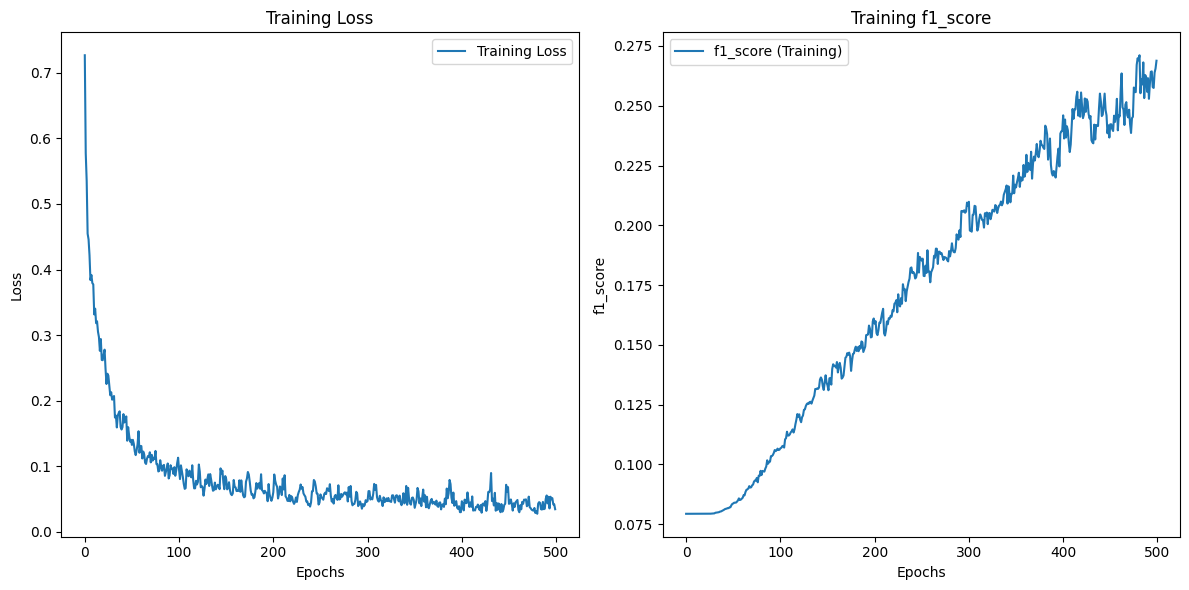

In [ ]:
plt.figure(figsize=(12, 6))

#Training Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#AUC
plt.subplot(1, 2, 2)
plt.plot(history.history['f1_score'], label='f1_score (Training)')
plt.title('Training f1_score')
plt.xlabel('Epochs')
plt.ylabel('f1_score')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
val_AUC, val_recall, val_f1_score, val_loss = model.evaluate(features_test, task_test, verbose = 0)

print("Val loss: ", val_loss)
print("Val AUC: ", val_AUC)
print("Val recall: ", val_recall)
print("Val f1: ", val_f1_score)

Val loss:  0.37704917788505554
Val AUC:  0.8077686429023743
Val recall:  0.6905764937400818
Val f1:  0.16267940402030945


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


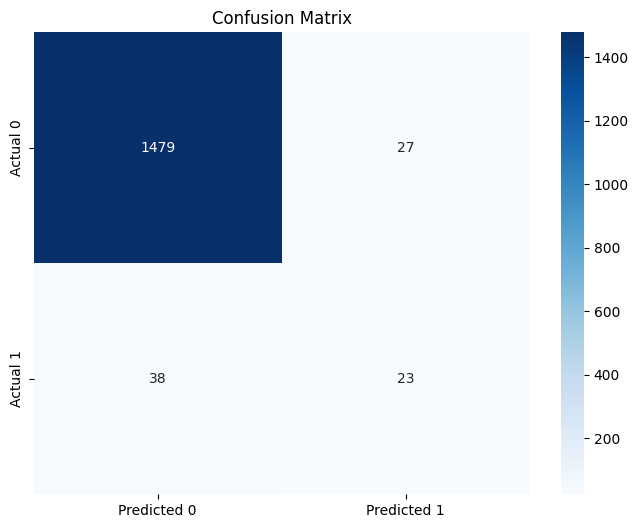

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# For your neural network:
# First, convert predictions to binary (0 or 1)
y_pred = (model.predict(features_test) >= 0.5).astype(int)
y_true = task_test  # your actual test labels

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot it
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# assign location
path='/content/weights.weights.h5'

model.save(path)
print('Model Saved!')

**Example Using the model**

In [ ]:
smiles_string = "CCOc1ccc2nc(S(N)(=O)=O)sc2c1"
features = featurize_smiles(smiles_string)

In [ ]:
input = features.reshape(1, -1)
scale = scaler.transform(input)
print(model.predict(scale))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


AttributeError: 'RobertaModel' object has no attribute 'predict'

# **PCA Chembert Model**
With SVM

In [ ]:
TOX21_TASKS = ['NR-AR']
task_data = data.iloc[:, 0:1]
feature_data = data.iloc[:, 14:]

In [ ]:
# normalize data
scaler = StandardScaler()
feature_data_normal = scaler.fit_transform(feature_data)

In [ ]:
from joblib import dump, load
dump(scaler, "scaler.pkl")

['scaler.pkl']

In [ ]:
from sklearn.decomposition import PCA

myPca = PCA()

myPca.fit(feature_data_normal)

var = myPca.explained_variance_ratio_

In [ ]:
feature_data_pca = myPca.transform(feature_data_normal)

See how many features we should use

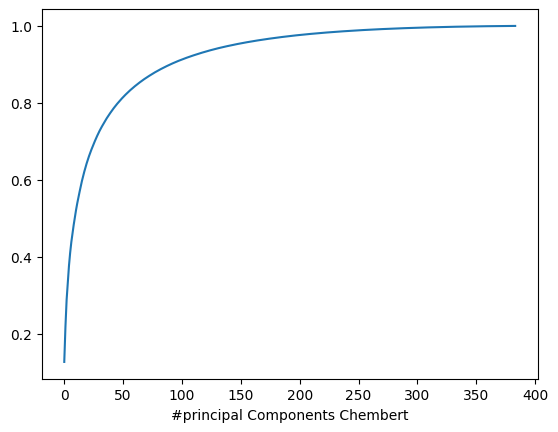

In [ ]:
plt.plot(np.cumsum(var))
plt.xlabel("#principal Components Chembert")
plt.show()

Maybe the first 266 to be safe

In [ ]:
feature_data_pca = feature_data_pca[:,:266]

In [ ]:
print(task_data.shape)
print(feature_data_pca.shape)
#split the data into training and test data
features_train, features_test, task_train, task_test = train_test_split(feature_data_pca, task_data, test_size=0.20, random_state=42)

(7831, 1)
(7831, 266)


In [ ]:
task_train.value_counts()

,count
NR-AR,
0,6016
1,248


In [ ]:
def calculate_class_weights(y):
    unique_classes, class_counts = np.unique(y, return_counts=True)
    total_samples = len(y)
    class_weights = {}

    for class_label, class_count in zip(unique_classes, class_counts):
        class_weight = total_samples / (2.0 * class_count)
        class_weights[class_label] = class_weight

    return class_weights

# y contains the class labels (0s and 1s) for the binary classification problem
class_weights = calculate_class_weights(task_train)
print("Class weights:", class_weights)

Class weights: {0: 0.5206117021276596, 1: 12.629032258064516}


In [ ]:
features_train = np.array(features_train)
task_train = np.array(task_train)

features_test = np.array(features_test)
task_test = np.array(task_test)

print(type(features_train), features_train.shape)
print(type(task_train), task_train.shape)

<class 'numpy.ndarray'> (6264, 266)
<class 'numpy.ndarray'> (6264, 1)


**Support Vector Machine Implementation**

In [ ]:
from sklearn import svm

clf = svm.SVC()
clf.fit(features_train, task_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on the test set
y_pred = clf.predict(features_test)

# Evaluate performance
accuracy = accuracy_score(task_test, y_pred)
precision = precision_score(task_test, y_pred)
recall = recall_score(task_test, y_pred)
f1 = f1_score(task_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9757498404594767
Precision: 0.96
Recall: 0.39344262295081966
F1 Score: 0.5581395348837209


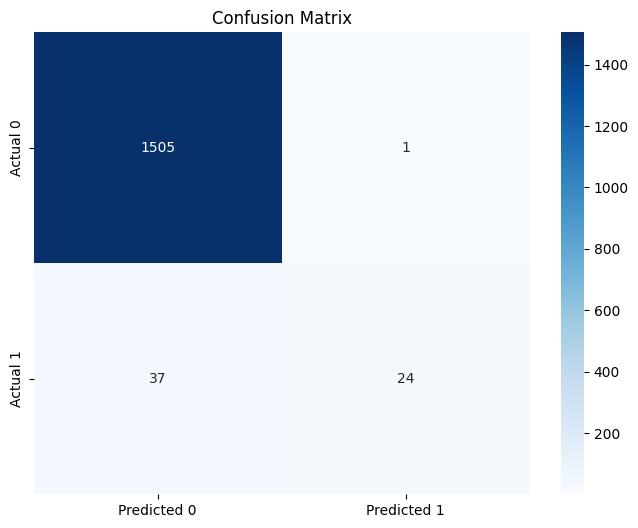

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# For your neural network:
# First, convert predictions to binary (0 or 1)
y_pred = clf.predict(features_test)
y_true = task_test  # your actual test labels

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot it
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.show()

In [ ]:
dump(clf, "SVM.pkl")

['SVM.pkl']

In [ ]:
print(task_data.iloc[[3000]].to_numpy())
print(task_data.iloc[[1984]].to_numpy())

print(task_data.iloc[[1987]].to_numpy())
print(task_data.iloc[[398]].to_numpy())

[[1]]
[[0]]
[[0]]
[[1]]


In [ ]:
test_input = feature_data.iloc[[3000]].to_numpy();
test_input = scaler.transform(test_input);
test_input = myPca.transform(test_input);
test_input = test_input[:,:266];

prediction = clf.predict(test_input)
print("prediction:", prediction)

prediction: [1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Predicting with custom smiles (Website will use this method)

In [ ]:
from sklearn import svm
from joblib import dump, load



In [ ]:
clf = load("SVM.pkl")

In [ ]:
smiles_string = "CCOc1ccc2nc(S(N)(=O)=O)sc2c1"
features = featurize_smiles(smiles_string) #reference the very first cells

In [ ]:
scaled_inputs = scaler.transform(features.reshape(1, -1))
test_input = myPca.transform(scaled_inputs);
test_input = test_input[:,:266];
print(clf.predict(test_input))

[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**Model-based Implementation**

In [ ]:
def design_model(features):
    model = Sequential(name="Model")
    num_features = features.shape[1]

    #input layer
    inputs = Input(shape=(num_features,))

    # Add a normalizer layer
    normalizer = Normalization()
    normalizer.adapt(features)

    inputs = normalizer(inputs)

    #Hidden layers
    x1 = Dense(32, activation="relu")(inputs)
    x1 = Dropout(0.42)(x1)  # Prevent overfitting (42 - the meaning of life)


    outputs = Dense(1, activation='sigmoid', name='output')(x1) #Binary Classification

    model = Model(inputs=inputs, outputs=outputs)

    opt = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy',  metrics=["AUC", "f1_score", "recall"], optimizer=opt)

    return model

In [ ]:
# Build the model
model = design_model(feature_data_pca)

In [ ]:
print(model.layers)

print(model.summary())

[<InputLayer name=keras_tensor_25CLONE, built=True>, <Dense name=dense_5, built=True>, <Dropout name=dropout_4, built=True>, <Dense name=output, built=True>]


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ keras_tensor_25CLONE (InputLayer)    │ (None, 266)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           8,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,577 (33.50 KB)

 Trainable params: 8,577 (33.50 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
history = model.fit(features_train,
                    task_train,
                    epochs=250,
                    batch_size=32,
                    verbose=1,
                    validation_split=0.2,
                    class_weight=class_weights)

Epoch 1/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - AUC: 0.5361 - f1_score: 0.0833 - loss: 1.0335 - recall: 0.6779 - val_AUC: 0.7601 - val_f1_score: 0.0634 - val_loss: 0.6229 - val_recall: 0.6829
Epoch 2/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - AUC: 0.7417 - f1_score: 0.0772 - loss: 0.6387 - recall: 0.6667 - val_AUC: 0.7683 - val_f1_score: 0.0634 - val_loss: 0.5125 - val_recall: 0.6341
Epoch 3/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - AUC: 0.8368 - f1_score: 0.0813 - loss: 0.5193 - recall: 0.7493 - val_AUC: 0.7704 - val_f1_score: 0.0634 - val_loss: 0.4762 - val_recall: 0.6585
Epoch 4/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - AUC: 0.8533 - f1_score: 0.0805 - loss: 0.4680 - recall: 0.7925 - val_AUC: 0.7548 - val_f1_score: 0.0634 - val_loss: 0.4105 - val_recall: 0.6098
Epoch 5/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - AUC: 0.9070 - f1_score: 0.0895 - loss: 0.4131 - recall: 0.8300 - val_AUC: 0.7554 - val_f1_score: 0.0634 - val_loss: 0.3713 - val_recall: 0.6098
Epoc

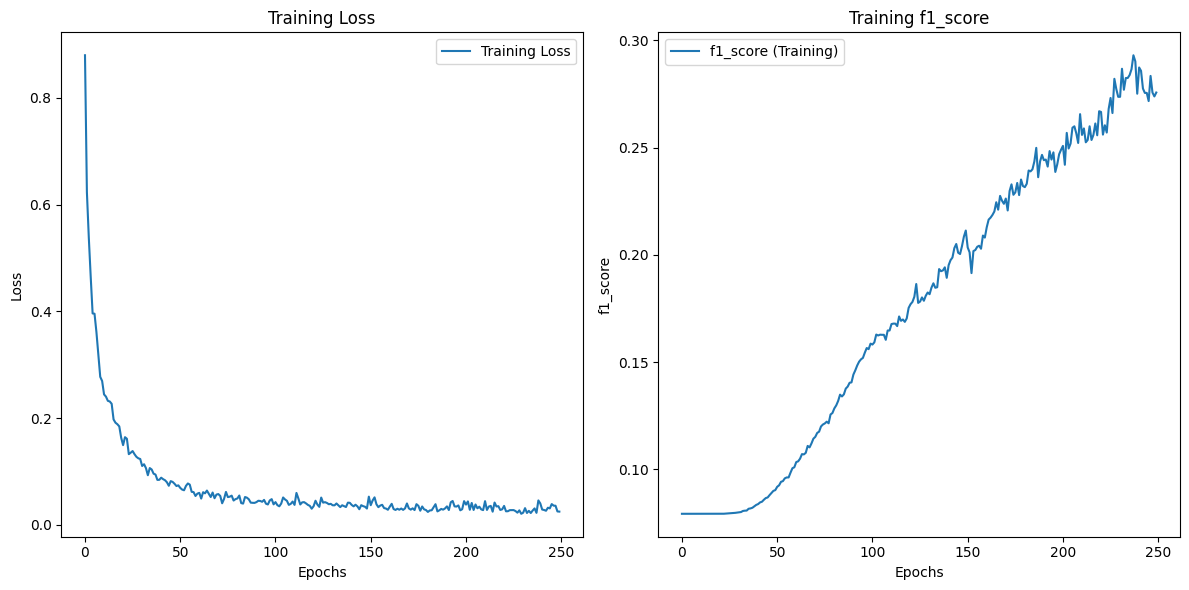

In [ ]:
plt.figure(figsize=(12, 6))

#Training Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#AUC
plt.subplot(1, 2, 2)
plt.plot(history.history['f1_score'], label='f1_score (Training)')
plt.title('Training f1_score')
plt.xlabel('Epochs')
plt.ylabel('f1_score')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
val_AUC, val_recall, val_f1_score, val_loss = model.evaluate(features_test, task_test, verbose = 0)

print("Val loss: ", val_loss)
print("Val AUC: ", val_AUC)
print("Val recall: ", val_recall)
print("Val f1: ", val_f1_score)

Val loss:  0.37704917788505554
Val AUC:  0.9361008405685425
Val recall:  0.6902280449867249
Val f1:  0.17171713709831238


49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


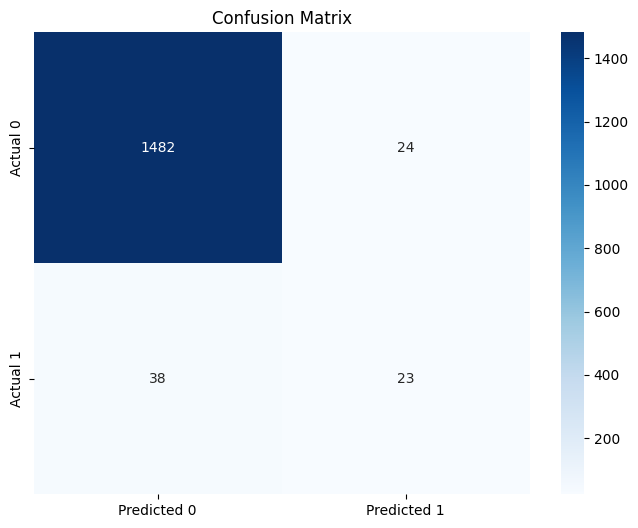

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# For your neural network:
# First, convert predictions to binary (0 or 1)
y_pred = (model.predict(features_test) >= 0.5).astype(int)
y_true = task_test  # your actual test labels

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot it
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.show()

PCA TOX USAGE WITH CUSTOM SMILES

In [ ]:
smiles_string = "CCOc1ccc2nc(S(N)(=O)=O)sc2c1"
features = featurize_smiles(smiles_string)

In [ ]:
scaled_inputs = scaler.transform(features.reshape(1, -1))
test_input = myPca.transform(scaled_inputs);
test_input = test_input[:,:266];
print(model.predict(test_input))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[[2.1764243e-15]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


FROM DATASET

In [ ]:
print(task_data.iloc[[3000]].to_numpy())
print(task_data.iloc[[1984]].to_numpy())

print(task_data.iloc[[1987]].to_numpy())
print(task_data.iloc[[398]].to_numpy())


[[1]]
[[0]]
[[0]]
[[1]]


In [ ]:
test_input = feature_data.iloc[[3000]].to_numpy();
test_input = scaler.transform(test_input);
test_input = myPca.transform(test_input);
test_input = test_input[:,:266];
print(model.predict(test_input))

test_input = feature_data.iloc[[1984]].to_numpy();
test_input = scaler.transform(test_input);
test_input = myPca.transform(test_input);
test_input = test_input[:,:266];
print(model.predict(test_input))

test_input = feature_data.iloc[[1987]].to_numpy();
test_input = scaler.transform(test_input);
test_input = myPca.transform(test_input);
test_input = test_input[:,:266];
print(model.predict(test_input))

test_input = feature_data.iloc[[398]].to_numpy();
test_input = scaler.transform(test_input);
test_input = myPca.transform(test_input);
test_input = test_input[:,:266];
print(model.predict(test_input))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[[0.9998051]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
[[1.1108432e-27]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
[[9.3030976e-21]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
[[0.9995701]]


# **LDA Chembert model**

In [ ]:
TOX21_TASKS = ['NR-AR']
task_data_og = data.iloc[:, 0:1]
task_data = data.iloc[:, 0:1]
feature_data = data.iloc[:, 14:]

In [ ]:
TOX21_TASKS = ['NR-AR']
task_data_og = data.iloc[:, 0:12]
task_data = data.iloc[:, 0:12]
feature_data = data.iloc[:, 14:]

In [ ]:
# normalize data
scaler = StandardScaler()
feature_data_normal = scaler.fit_transform(feature_data)
feature_data_normal.shape

(7831, 384)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import make_classification


# define dataset
feature_data_normal, task_data = make_classification(n_samples=7831, n_features=384, n_informative=384, n_redundant=0,  random_state=42, n_classes=12)
# summarize the dataset
print(feature_data_normal.shape, task_data.shape)



new_dimensionality = 2

lda = LinearDiscriminantAnalysis(n_components=new_dimensionality)
feature_data_lda = lda.fit_transform(feature_data_normal, task_data)

(7831, 384) (7831,)


In [ ]:
print(feature_data_lda.shape)

(7831, 2)


In [ ]:
feature_data_lda = pd.DataFrame(feature_data_lda)


In [ ]:
feature_data_lda

,0,1
0,-0.675055,0.857416
1,1.958642,1.860647
2,-0.014323,-0.154636
3,-2.499847,-0.554537
4,1.523880,1.074627
...,...,...
7826,-0.169762,0.985711
7827,-0.246759,1.199838
7828,2.677389,-0.749532
7829,-0.114774,-0.188883


In [ ]:
task_data = pd.DataFrame(task_data)
task_data.head()

,0
0,9
1,5
2,0
3,4
4,0


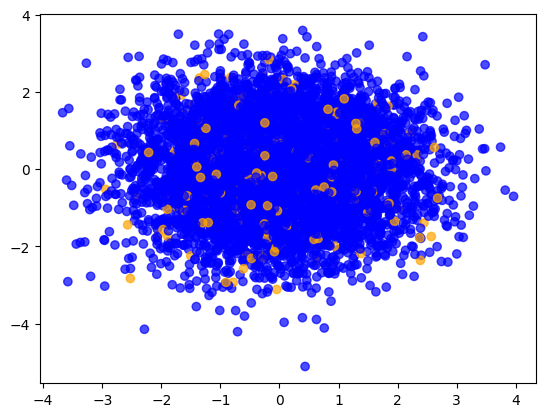

In [ ]:
colors = (task_data_og["NR-AR"]).map({0: "blue", 1: "orange"})

plt.scatter(feature_data_lda[0], feature_data_lda[1], c=colors, alpha=0.7)

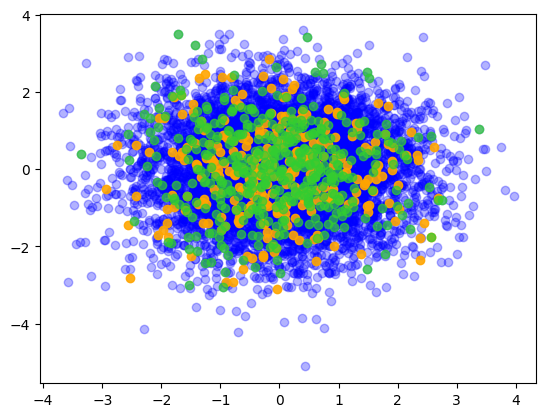

In [ ]:
idx_orange = task_data_og["NR-AR"] == 1
idx_green = task_data_og["SR-p53"] == 1
idx_blue = task_data_og["NR-AR"] == 0

# Scatter plot with different alpha values
plt.scatter(feature_data_lda[0][idx_blue], feature_data_lda[1][idx_blue],
            color="blue", alpha=0.3, label="NR-AR = 0")  # Lower alpha for blue

plt.scatter(feature_data_lda[0][idx_orange], feature_data_lda[1][idx_orange],
            color="orange", alpha=0.9, label="NR-AR = 1")  # Full opacity for orange

plt.scatter(feature_data_lda[0][idx_green], feature_data_lda[1][idx_green],
            color="limegreen", alpha=0.7, label="NR-ER = 1")  # Full opacity for orange

In [ ]:
# autoencoder (convolutional?)
# I want to make a better lower-dimension latent space representation of my data for my TSNE method
# Ideal: take from shape (1000, 28, 28) to (1000, 14, 14) then to (1000, 7, 7)
from tensorflow import keras
input_shape = keras.Input(shape=(384,))

# These two dense layers that reduce its dimensionality
encoded = keras.layers.Dense(128, activation='relu')(input_shape)
encoded = keras.layers.Dense(64, activation='relu')(encoded)
encoded = keras.layers.Dense(32, activation='relu')(encoded)
encoded = keras.layers.Dense(16, activation='relu')(encoded)

encoded = keras.layers.Dense(8, activation='relu')(encoded) #final latency of endcoded layer

decoded = keras.layers.Dense(16, activation='relu')(encoded)
decoded = keras.layers.Dense(32, activation='relu')(encoded)
decoded = keras.layers.Dense(64, activation='relu')(encoded)
decoded = keras.layers.Dense(128, activation='relu')(decoded)

decoded = keras.layers.Dense(384, activation='sigmoid')(decoded) #back to original dimensions


#define and compile model
autoencoder = keras.Model(inputs=input_shape, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
features_train, features_test, task_train, task_test = train_test_split(feature_data_normal, task_data, test_size=0.20, random_state=42)

autoencoder.fit(features_train,
                features_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                verbose=True,
                validation_data=(features_test, features_test))

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - loss: 0.6048 - val_loss: -0.4321
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: -5.3342 - val_loss: -68.0739
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: -434.2481 - val_loss: -4085.3594
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: -17062.1797 - val_loss: -107664.2578
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: -330987.6250 - val_loss: -1453081.7500
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: -3669050.0000 - val_loss: -12188624.0000
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: -26943688.0000 - val_loss: -72984296.0000
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: -146535776.0000 - val_loss: -335171616.0000
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: -651035520.0000 - val_loss: -1260564736.0000
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: -2306915584.0000 - val_loss: -4027482112.0000
Epoch 11/50
25/25 ━━━━━━━━

In [ ]:
encoder = keras.Model(autoencoder.input, autoencoder.layers[-4].output)
encoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 384)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             136 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 60,280 (235.47 KB)

 Trainable params: 60,280 (235.47 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
encoded_imgs = encoder.predict(features_train)
print(encoded_imgs.shape)

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
(6264, 8)


In [ ]:
from sklearn.manifold import TSNE
dimentionality = 2

tsne_model = TSNE(n_components=dimentionality, perplexity=25.0)

'''
n_components: Dimension of the embedded space (2d, 3d, 4d, etc....)
perplexity: The number of nearest neighbors

'''

np.random.seed(69420)

tsne_result = tsne_model.fit_transform(encoded_imgs)
# print(tsne_result.shape)

# subsample_idc = np.random.choice(encoded_imgs.shape[0], 1000, replace=False)
# encoded_imgs = encoded_imgs[subsample_idc,:]
# train_y = train_y[subsample_idc]

In [ ]:
tsne_result_frame = pd.DataFrame(tsne_result)

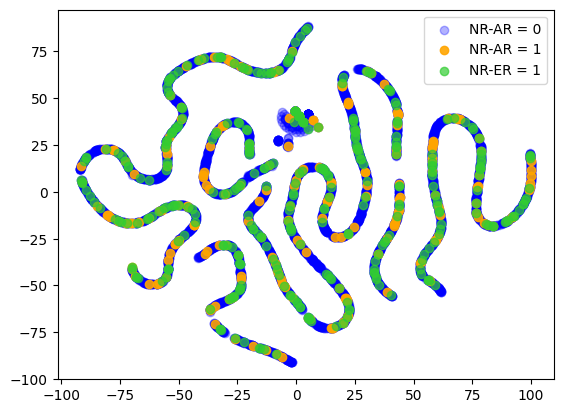

In [ ]:
idx_orange = task_data_og["NR-AR"] == 1
idx_green = task_data_og["SR-p53"] == 1
idx_blue = task_data_og["NR-AR"] == 0

# Scatter plot with different alpha values
plt.scatter(tsne_result_frame[0][idx_blue], tsne_result_frame[1][idx_blue],
            color="blue", alpha=0.3, label="NR-AR = 0")  # Lower alpha for blue

plt.scatter(tsne_result_frame[0][idx_orange], tsne_result_frame[1][idx_orange],
            color="orange", alpha=0.9, label="NR-AR = 1")  # Full opacity for orange

plt.scatter(tsne_result_frame[0][idx_green], tsne_result_frame[1][idx_green],
            color="limegreen", alpha=0.7, label="NR-ER = 1")  # Full opacity for orange

plt.legend()
plt.show()